In [ ]:
!nvidia-smi

Mon Oct 11 05:34:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Darknet

### Initialising darknet

In [ ]:
%cd /content/gdrive/MyDrive/yolov4-darknet

/content/gdrive/MyDrive/yolov4-darknet


In [ ]:
import os
import cv2
import numpy as np
import darknet
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
!git clone https://github.com/AlexeyAB/darknet


In [ ]:
%cd /content/gdrive/MyDrive/yolov4-darknet/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/yolov4-darknet/darknet


In [ ]:
!make

## Dataset

Google open images is used - 
[Link](https://drive.google.com/drive/folders/1DghyfRyo3Rdl0lxBwkevsBjKIjJ_5NrX?usp=sharing)

In [ ]:
#list of image files in the dataset
data_path = '/content/gdrive/MyDrive/yolov4-darknet/darknet/data/obj/train/'
files = os.listdir(data_path)

img_arr = []
num = 5

#appending images array to a list
for fimg in files:
    if fimg.endswith('.jpg'):
      demo = img.imread(data_path+fimg)
      img_arr.append(demo)
      if len(img_arr) == num:
        break

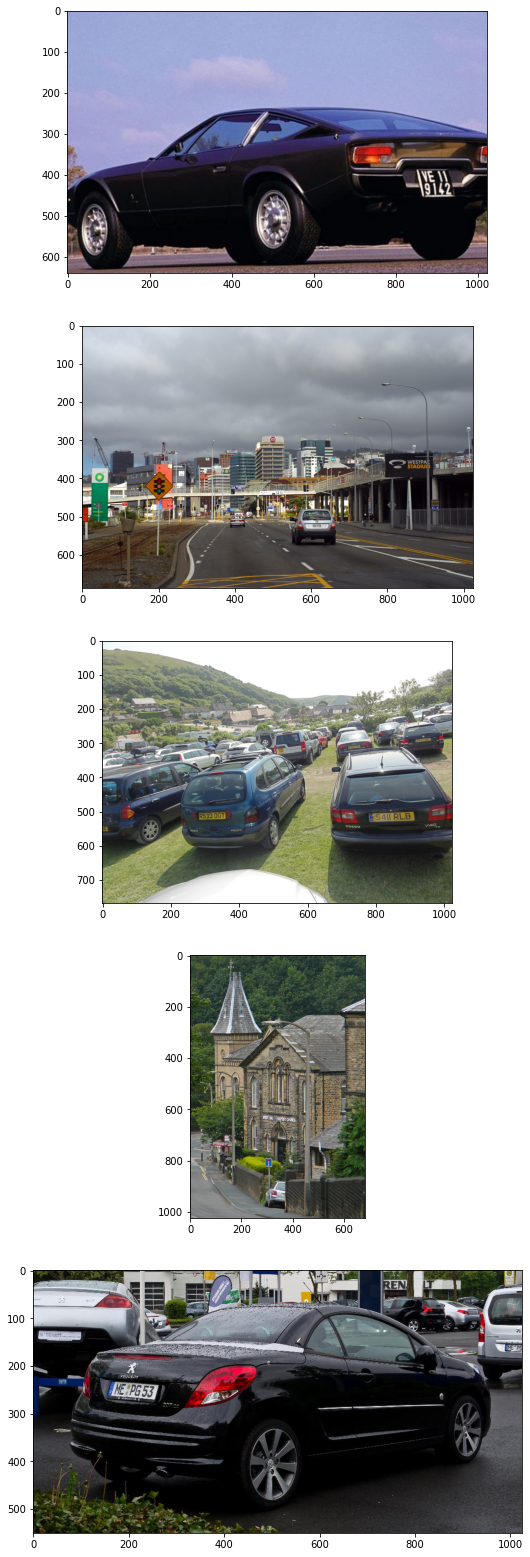

In [ ]:
_, axs = plt.subplots(num, 1, figsize=(50, 28))

axs = axs.flatten()

for cent, ax in zip(img_arr, axs):
    ax.imshow(cent)
plt.show()

### Getting YOLOv4 pre-trained weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### Utility functions

In [ ]:
def disp(input):
  image = img.imread(input)
  plt.figure(figsize = (25,14))
  plt.imshow(image)
  plt.show()

# Training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map


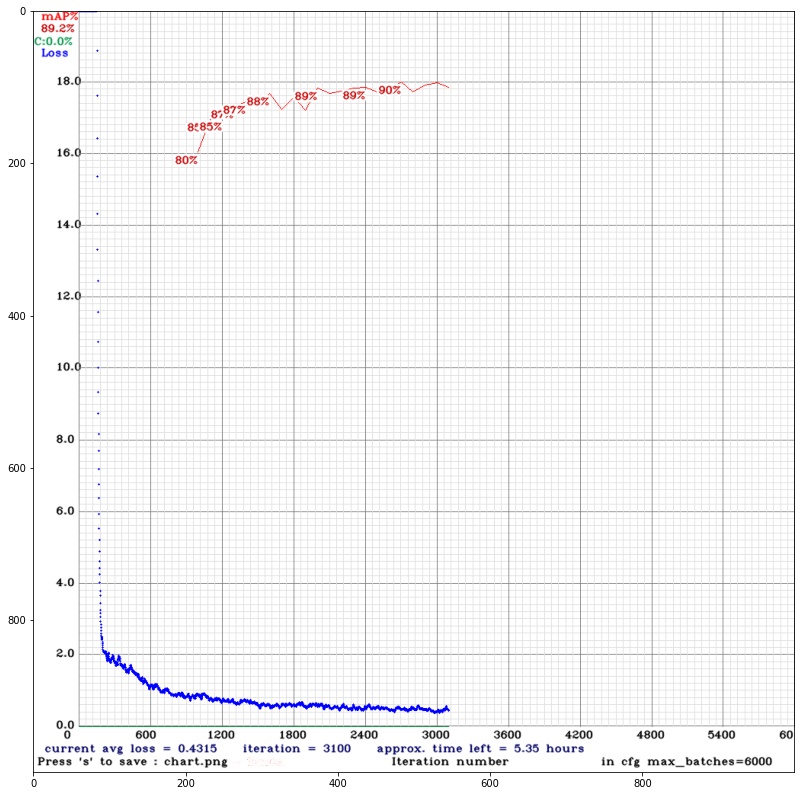

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/darknet/chart_yolov4-obj.png')

## Yolo-tiny

In [ ]:
%cd /content/gdrive/MyDrive/yolov4-darknet/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-obj.cfg yolov4-tiny.conv.29 -dont_show -map


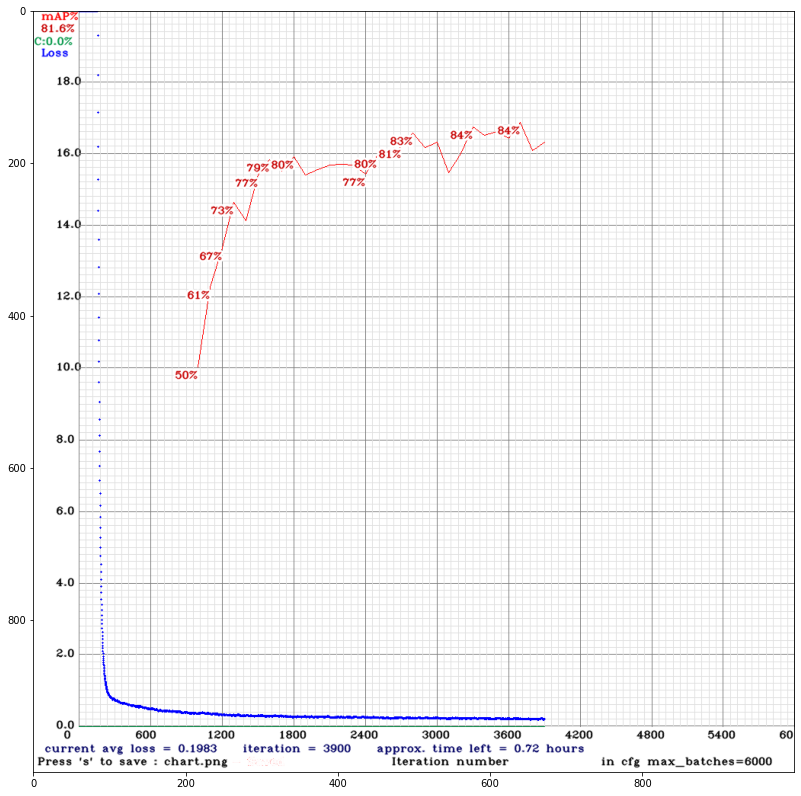

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/darknet/chart_yolov4-tiny-obj.png')

## Inference

In [ ]:
%cd /content/gdrive/MyDrive/yolov4-darknet/darknet

### YOLOv4

**Test image 1**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b076ad266891d7aa.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out/out_b076ad266891d7aa.jpg')

**Test image 2**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b1096bc91a89b0cf.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out/out_b1096bc91a89b0cf.jpg')

**Test image 3**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b8a3f2ea385e45b3.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out/out_b8a3f2ea385e45b3.jpg')

**Test image 4**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/c91ee912164d8ecb.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out/out_c91ee912164d8ecb.jpg')

**Test image 5**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/f194eaf4f3d1d835.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out/out_f194eaf4f3d1d835.jpg')

### YOLOv4-Tiny

**Test image 1**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b076ad266891d7aa.jpg --output /content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny/out_b076ad266891d7aa.jpg')

**Test image 2**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b076ad266891d7aa.jpg --output /content/gdrive/MyDrive/yolov4-darknet/demo-out-tiny  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny/out_b1096bc91a89b0cf.jpg')

**Test image 3**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/b8a3f2ea385e45b3.jpg --output /content/gdrive/MyDrive/yolov4-darknet/demo-out-tiny  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny/out_b8a3f2ea385e45b3.jpg')

**Test image 4**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/c91ee912164d8ecb.jpg --output /content/gdrive/MyDrive/yolov4-darknet/demo-out-tiny  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny/out_c91ee912164d8ecb.jpg')

**Test image 5**

In [ ]:
!python darknet_images.py --thresh 0.2 --input /content/gdrive/MyDrive/yolov4-darknet/demo_input/f194eaf4f3d1d835.jpg --output /content/gdrive/MyDrive/yolov4-darknet/demo-out-tiny  --weights /content/gdrive/MyDrive/yolov4-darknet/checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('/content/gdrive/MyDrive/yolov4-darknet/output/demo-out-tiny/out_f194eaf4f3d1d835.jpg')

# Conclusion

YOLOv4 performs better than YOLOv4-tiny on google open images dataset with more than 90% mAP and speed of around 25 FPS.

YOLOv4 tiny gives mAP of 84% with speed of more than 40 FPS

## Resources

YOLOv4 code and weights- https://github.com/AlexeyAB/darknet

Dataset and images - https://storage.googleapis.com/openimages/web/index.html



